In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
import xgboost as xgb
MAX_TOWERS = 6
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import random

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error
from scipy.sparse import hstack 
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import math

/home/snake/anaconda3/envs/myenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/snake/anaconda3/envs/myenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/snake/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
train_main = pd.read_csv("../data/task1/train_1.8.csv", encoding="cp1251")
train_aux_coords = pd.read_csv("../data/task1_additional/coords_train_1.1.csv", encoding="cp1251")

In [21]:
train_main.shape

(3357, 123)

In [23]:
train_aux_coords["well_hash"].duplicated()

0      False
1       True
2       True
3      False
4      False
5       True
6      False
7      False
8       True
9       True
10     False
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19     False
20      True
21      True
22     False
23      True
24     False
25      True
26      True
27     False
28      True
29     False
30      True
31      True
32     False
33      True
34     False
35      True
36     False
37      True
38     False
39      True
40     False
41      True
42     False
43      True
44     False
45      True
46     False
47      True
48     False
49      True
50     False
51      True
52     False
53     False
54      True
55     False
56      True
57     False
58      True
59     False
60      True
61     False
62      True
63     False
64      True
65     False
66      True
67     False
68      True
69     False
70      True
71     False
72      True
73     False
74      True
75     False
76      True

In [19]:
all_recs = pd.merge(train_main, train_aux_coords, how="right", left_on="Скважина", right_on="well_hash", indicator=True)

In [20]:
train_main.join(train_aux_coords)

(2844, 131)

In [13]:
all_recs.columns

Index(['Скважина', 'Дата', 'ГТМ', 'Метод', 'Характер работы', 'Состояние',
       'Время работы, ч', 'Время накопления', 'Нефть, т', 'Попутный газ, м3',
       ...
       'ГП(ГРП) Дебит жидкости скорр-ый', 'ГП - Общий прирост Qн', 'ПЛАСТ',
       'УСТЬЕ_X', 'УСТЬЕ_Y', 'ПЛАСТ_X', 'ПЛАСТ_Y', 'Альтитуда', 'well_hash',
       '_merge'],
      dtype='object', length=131)

In [5]:
train = get_train()



train[train[["Скважина","Дата"]].duplicated()]

Скважина        Дата  ГТМ    Метод  \
1     53514b4c4150ad897d82dd7d42cfc1a5  2012-03-30  0.0  ЭЦН/ФОН   
2     53514b4c4150ad897d82dd7d42cfc1a5  2012-03-30  0.0  ЭЦН/ФОН   
4     53514b4c4150ad897d82dd7d42cfc1a5  2012-04-30  0.0      ЭЦН   
5     53514b4c4150ad897d82dd7d42cfc1a5  2012-04-30  0.0      ЭЦН   
7     53514b4c4150ad897d82dd7d42cfc1a5  2012-05-30  0.0      ЭЦН   
8     53514b4c4150ad897d82dd7d42cfc1a5  2012-05-30  0.0      ЭЦН   
10    53514b4c4150ad897d82dd7d42cfc1a5  2012-06-30  0.0      ЭЦН   
11    53514b4c4150ad897d82dd7d42cfc1a5  2012-06-30  0.0      ЭЦН   
13    53514b4c4150ad897d82dd7d42cfc1a5  2012-07-31  0.0      ЭЦН   
14    53514b4c4150ad897d82dd7d42cfc1a5  2012-07-31  0.0      ЭЦН   
16    53514b4c4150ad897d82dd7d42cfc1a5  2012-08-30  0.0      ЭЦН   
17    53514b4c4150ad897d82dd7d42cfc1a5  2012-08-30  0.0      ЭЦН   
25    8f3131afe66d3266c23142786786b265  2014-05-01  1.0      ФОН   
27    8f3131afe66d3266c23142786786b265  2014-05-31  1.0  ЭЦН/ФОН   
29    8f3131afe66d3266c23142786786b265  2014-07-01  0.0      ЭЦН   
31    8f3131afe66d3266c23142786786b265  2014-08-01  0.0      ЭЦН   
33    8f3131afe66d3266c23142786786b265  2014-08-31  NaN      NaN   
35    8f3131afe66d3266c23142786786b265  2014-10-01  NaN      NaN   
43    3a64ba1b382ffeb0c514a4a569acff44  2011-10-01  0.0  ЭЦН/ФОН   
44    3a64ba1b382ffeb0c514a4a569acff44  2011-10-01  0.0  ЭЦН/ФОН   
45    3a64ba1b382ffeb0c514a4a569acff44  2011-10-01  0.0  ЭЦН/ФОН   
46    3a64ba1b382ffeb0c514a4a569acff44  2011-10-01  0.0  ЭЦН/ФОН   
47    3a64ba1b382ffeb0c514a4a569acff44  2011-10-01  0.0  ЭЦН/ФОН   
49    3a64ba1b382ffeb0c514a4a569acff44  2011-10-31  0.0      ЭЦН   
50    3a64ba1b382ffeb0c514a4a569acff44  2011-10-31  0.0      ЭЦН   
51    3a64ba1b382ffeb0c514a4a569acff44  2011-10-31  0.0      ЭЦН   
52    3a64ba1b382ffeb0c514a4a569acff44  2011-10-31  0.0      ЭЦН   
53    3a64ba1b382ffeb0c514a4a569acff44  2011-10-31  0.0      ЭЦН   
55    3a64ba1b382ffeb0c514a4a569acff44  2011-12-01  0.0      ЭЦН   
56    3a64ba1b382ffeb0c514a4a569acff44  2011-12-01  0.0      ЭЦН   
57    3a64ba1b382ffeb0c514a4a569acff44  2011-12-01  0.0      ЭЦН   
58    3a64ba1b382ffeb0c514a4a569acff44  2011-12-01  0.0      ЭЦН   
59    3a64ba1b382ffeb0c514a4a569acff44  2011-12-01  0.0      ЭЦН   
61    3a64ba1b382ffeb0c514a4a569acff44  2012-01-01  0.0      ЭЦН   
62    3a64ba1b382ffeb0c514a4a569acff44  2012-01-01  0.0      ЭЦН   
63    3a64ba1b382ffeb0c514a4a569acff44  2012-01-01  0.0      ЭЦН   
64    3a64ba1b382ffeb0c514a4a569acff44  2012-01-01  0.0      ЭЦН   
65    3a64ba1b382ffeb0c514a4a569acff44  2012-01-01  0.0      ЭЦН   
67    3a64ba1b382ffeb0c514a4a569acff44  2012-01-29  0.0      ЭЦН   
68    3a64ba1b382ffeb0c514a4a569acff44  2012-01-29  0.0      ЭЦН   
69    3a64ba1b382ffeb0c514a4a569acff44  2012-01-29  0.0      ЭЦН   
70    3a64ba1b382ffeb0c514a4a569acff44  2012-01-29  0.0      ЭЦН   
71    3a64ba1b382ffeb0c514a4a569acff44  2012-01-29  0.0      ЭЦН   
73    3a64ba1b382ffeb0c514a4a569acff44  2012-02-29  0.0      ЭЦН   
74    3a64ba1b382ffeb0c514a4a569acff44  2012-02-29  0.0      ЭЦН   
75    3a64ba1b382ffeb0c514a4a569acff44  2012-02-29  0.0      ЭЦН   
76    3a64ba1b382ffeb0c514a4a569acff44  2012-02-29  0.0      ЭЦН   
77    3a64ba1b382ffeb0c514a4a569acff44  2012-02-29  0.0      ЭЦН   
79    d147dc766cf90a35a2db9d26a82746aa  2010-07-01  1.0  ЭЦН/ФОН   
81    d147dc766cf90a35a2db9d26a82746aa  2010-08-01  0.0      ЭЦН   
83    d147dc766cf90a35a2db9d26a82746aa  2010-08-31  0.0      ЭЦН   
85    d147dc766cf90a35a2db9d26a82746aa  2010-10-01  0.0      ЭЦН   
87    d147dc766cf90a35a2db9d26a82746aa  2010-10-31  0.0      ЭЦН   
89    d147dc766cf90a35a2db9d26a82746aa  2010-12-01  0.0      ЭЦН   
97    04d7884a9f7019671285b87ca468d0f1  2009-10-01  0.0  ЭЦН/ФОН   
98    04d7884a9f7019671285b87ca468d0f1  2009-10-01  0.0  ЭЦН/ФОН   
99    04d7884a9f7019671285b87ca468d0f1  2009-10-01  0.0  ЭЦН/ФОН   
100   04d7884a9f7019671285b87ca468d0f1  2009-10-01  0.0  ЭЦН/ФОН   
101   04d7884a9f70

In [42]:
len(train.drop_duplicates())

8903

In [43]:
len(train)

8975

In [2]:
from utils import get_test, get_train
from pipelines import common_pipeline, train_hook, target_hook, \
    cont_pipeline, cat_pipeline, null_cat_step, text_pipeline, date_pipeline
from cleaner import DataCleaner

dc = DataCleaner(common_pipelines=common_pipeline, column_pipelines=[
    cont_pipeline, null_cat_step, cat_pipeline, text_pipeline, date_pipeline],
                 train_hooks=train_hook, target_hooks=target_hook)

X_train, X_test, y_train, groups = dc.get_clean_data(get_train(), get_test(), group_col="Скважина")

after hooks
(8903, 153)
(412, 144)
Нефть, т dropped
{'Станок-качалка', 'Агент закачки', 'Примечание', 'Фирма ГРП', 'Тип газосепаратора'} dropped
['ТП(ИДН) Дебит жидкости скорр-ый', 'ТП(ИДН) Дебит жидкости', 'ТП(ГРП) Дебит жидкости', 'Нефть, м3', 'ТП(ГРП) Дебит жидкости скорр-ый', 'Дебит жидкости', 'ГП - Общий прирост Qн', 'Жидкость, м3'] dropped
After common_pipeline
(8903, 139)
(412, 139)


/home/snake/Projects/gp_oil/src/pipelines.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  train[c] = train[c].astype(str)
/home/snake/Projects/gp_oil/src/pipelines.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test[c] = test[c].astype(str)
/home/snake/Projects/gp_oil/src/pipelines.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

nans in column pipelines
False
shape_after_column_pipelines
(8903, 883)
(412, 883)


In [3]:
from utils import clean_non_targeted
X_train, groups, y_train = clean_non_targeted([X_train, groups], y_train)

(7045, 883)
(7045,)
(7045,)


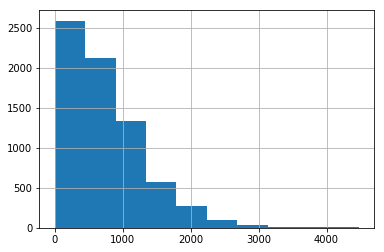

In [4]:
y_train.hist()

In [15]:
for c in X_train.columns:
    if str(c).startswith("pos"):
        print(c)
X_train[X_train["pos_number_143"]==1]

pos_number_1
pos_number_10
pos_number_100
pos_number_101
pos_number_102
pos_number_103
pos_number_104
pos_number_105
pos_number_106
pos_number_107
pos_number_108
pos_number_109
pos_number_11
pos_number_110
pos_number_111
pos_number_112
pos_number_113
pos_number_114
pos_number_115
pos_number_116
pos_number_117
pos_number_118
pos_number_119
pos_number_12
pos_number_120
pos_number_121
pos_number_122
pos_number_123
pos_number_124
pos_number_125
pos_number_126
pos_number_127
pos_number_128
pos_number_129
pos_number_13
pos_number_130
pos_number_131
pos_number_132
pos_number_133
pos_number_134
pos_number_135
pos_number_136
pos_number_137
pos_number_138
pos_number_139
pos_number_14
pos_number_140
pos_number_141
pos_number_142
pos_number_143
pos_number_15
pos_number_16
pos_number_17
pos_number_18
pos_number_19
pos_number_2
pos_number_20
pos_number_21
pos_number_22
pos_number_23
pos_number_24
pos_number_25
pos_number_26
pos_number_27
pos_number_28
pos_number_29
pos_number_3
pos_number_30
pos_num

V гель  Природный газ, м3  Дата запуска после КРС  \
7834  0.729097                0.0               -0.067512   

      Дата ввода в эксплуатацию  Пластовое давление начальное  \
7834                   0.017169                     -0.076487   

      К пр от стимуляции        Hf  Дебит попутного газа, м3/сут  \
7834           -0.164008  0.012552                       0.96601   

      Вязкость воды в пластовых условиях  Нефтенасыщенная толщина  \
7834                                 0.0                -0.046946   

      ГП(ИДН) Дебит жидкости       Эфф  ГП(ИДН) Дебит жидкости скорр-ый  \
7834               -0.136938 -0.082463                        -0.157411   

             k     I X/X  Число качаний ШГН  \
7834 -0.496316 -0.092551                0.0   

      Вязкость нефти в пластовых условиях      Гель  Глубина спуска  \
7834                             0.201113 -0.375298        0.045864   

      Глубина верхних дыр перфорации  Обводненность  \
7834                        0.121621      -0.149827   

      ГП(ГРП) Дебит жидкости скорр-ый  Давление наcыщения  Пластовое давление  \
7834                        -0.169485            0.126507            0.148113   

      Время до псевдоуст-ся режима  ГП - Забойное давление       Нэф  \
7834                     -0.116995                0.102476  1.463938   

      Дата ГРП  Удлинение  Простой, ч  Давление пластовое  Плотность нефти  \
7834 -0.028665  -0.028419   -0.109252            0.526285         0.300684   

      Буферное давление    Азимут  Плотность раствора глушения  \
7834           0.014765 -1.364459                     0.168334   

      Давление в линии  Коэффициент сепарации  Давление на приеме     Напор  \
7834          0.071413                    1.0           -0.078923  0.084856   

      Время накопления  Характеристический дебит жидкости  Диаметр штуцера  \
7834         -0.159984                          -0.146391        -0.253716   

      Замерное забойное давление  Радиус контура питания        JD  \
7834                    -0.22719                     0.0 -0.062888   

      Газовый фактор  Дебит конденсата       Низ  Время работы, ч       КВЧ  \
7834       -0.284478               0.0  0.185321         0.510696 -0.084803   

          М пр  ГП(ГРП) Дебит жидкости        Wf      SKIN  Дата пуска  \
7834  0.321613               -0.162828  0.973091  0.368885   -0.064359   

        Наклон  Диаметр плунжера  Время в накоплении  ТП - Забойное давление  \
7834 -0.067241               0.0           -0.133118                 0.04636   

      Забойное давление  Вязкость жидкости в пласт. условиях      М бр  \
7834           -0.07877                             0.165321 -0.298294   

      Удельный коэффициент  Обводненность (вес), %  Диаметр НКТ  \
7834             -0.133635               -0.155322     0.140631   

      Глубина текущего забоя  Затрубное давление  \
7834                0.036866            0.016162   

      Глубина спуска доп. оборудования  Плотность воды  \
7834                         -0.244288        0.074805   

      Длина хода плунжера ШГН  Рпл Хорнер  Производительность ЭЦН  \
7834                      0.0   -0.013959               -0.029377   

      Коэффициент подачи насоса       Ноб  ТП - JD опт.  \
7834                        0.0 -0.119407       0.00417   

      Коэффициент продуктивности     V под   JD факт  \
7834                   -0.106764  0.012072 -0.253589   

      Газ из газовой шапки, м3  Мощность ПЭД  ТП - SKIN  \
7834                       0.0     -0.181197  -0.284958   

      ГП(ИДН) Прирост дефита нефти  Ток рабочий  Динамическая высота  \
7834                     -0.143165    -0.032388             0.098467   

      Закачка, м3  Температура пласта  КН закрепленный      Верх       Pпл  \
7834    -0.165936           -0.121315              0.0 -0.004145 -0.063161   

      Диаметр дополнительного оборудования       FCD  Альтитуда  \
7834                             -0.222741  1.073959     0.4484   

      Приемистость, м

In [ ]:
def find_next_step_ind(delta, X, group):

def getXY_for_step(X,y, num_steps = 5, groups, group_col_prefix="pos_number_"):
    X_stepped = [X]
    y_stepped = [y]
    
    for delta in range(1,num_steps):
        group_X = X[gr]
    
    

In [4]:
def get_fold():
    return KFold(n_splits = 4,shuffle=True, random_state = 17)

In [5]:
def get_preds_for_cats(train, test, y, cat_features):
    print("start catboost")
    cb_regressor = CatBoostRegressor(logging_level="Silent", random_state=17)
    train_catboost_preds = cross_val_predict(cb_regressor, train, y)
    cb_regressor.fit(train,y=y, cat_features=cat_features)
    test_catboost_preds = pd.Series(cb_regressor.predict(test), index=test.index)
    print("finish catboost")
    return train_catboost_preds, test_catboost_preds

In [6]:
def get_cont_ensemble():
    print("start ensemble")
    ridge = Ridge(random_state=17)
    rtree = RandomForestRegressor(n_jobs=-1, n_estimators=150, random_state=17)
    svr = LinearSVR(random_state=17)
    xgboost = xgb.XGBRegressor(n_estimators=200, max_depth=5, random_state=17, n_jobs=-1)
    nn = MLPRegressor(max_iter=500, random_state=17)
    et = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, random_state=17)
    lasso = Lasso(random_state=17)
    return [lasso, rtree, xgboost]

def get_cont_ensemble_names():
    return ["lasso", "rtree", "xgboost"]

In [7]:
def get_meta_train_preds(X, y, ):
    predicts = []
    for cl in get_cont_ensemble():
        predicts.append(cross_val_predict(cl, X,y, n_jobs=-1, cv=get_fold()))
    return pd.DataFrame(np.vstack(predicts).transpose(), index=y.index, columns=get_cont_ensemble_names())

def get_meta_test_predict(X_train, y_train, X_test):
    test_predicts = []
    
    for i,cl in enumerate(get_cont_ensemble()):
        print("%s:%s"%(i,cross_val_score(cl, X_train, y_train, n_jobs=-1, scoring="neg_mean_absolute_error", cv=get_fold())))
        cl.fit(X_train, y_train)
        pr = cl.predict(X_test)
        test_predicts.append(pr)
    #add svd predicts
    return  pd.DataFrame(np.vstack(test_predicts).transpose(), index=X_test.index, columns=get_cont_ensemble_names())

def get_stacked_ensemble_predict(X_meta, y, X_test):
    regressor = xgb.XGBRegressor(random_state=17, n_jobs=-1)
    regressor.fit(X_meta, y)
    return pd.DataFrame(regressor.predict(X_test), index=X_test.index)

In [8]:
def get_n_item_index(group_size, df, group):
    new_df = pd.concat([df, group], axis = 1)
    index = []
    group = new_df.groupby(["Скважина"])
    for name, group in group:
        if len(group)<group_size:
            continue
        for start in range(len(group.index) - group_size):
            gr =group.index[start:start+group_size]
            index.append(gr)
    return index

def get_timed_ds(meta_size, df, group, y):
    if meta_size >= 1:
        meta_indexes = get_n_item_index(meta_size, df, group)
        first_value_idx = []
        timed_ds = df.copy()
        metas = []
        columns = []
        for i in range(meta_size):
            columns.append("meta%s"%str(i))
        for a in meta_indexes:
            first_value_idx.append(a[0])
            metas.append(list(y.loc[a]))
        metas_df = pd.DataFrame.from_records(metas, index=first_value_idx, columns=columns)
        return pd.concat([timed_ds.loc[first_value_idx], metas_df], axis=1)
    elif meta_size == 0:
        return df
    
def get_n_tower_predictions(n, train, y, test, train_group):
    X_meta_train = get_meta_train_preds(train, y)
    X_meta_test = get_meta_test_predict(train, y, test)
    test_predictions= []
    for i in range(0,n):
        train_timed_ds = get_timed_ds(i,X_meta_train, train_group, y)
        y_timed = y.loc[train_timed_ds.index]
        test_predict = get_stacked_ensemble_predict(train_timed_ds, y_timed,X_meta_test)
        test_predictions.append(test_predict)
        X_meta_test["meta%s"%i]=test_predict
    return pd.concat(test_predictions,axis=1)

In [9]:
def create_submission(fname, df):
    final_pred = pd.Series(df)
    final_pred.to_csv(fname,header=["_VAL_"],index_label=["_ID_"])

In [12]:
def transform_target(target):
    return target

def get_prediction(train_cont, test_cont, train_group, y_train, constant = 701.4750):
    np.random.seed(17)
    random.seed(17)
    y_train = transform_target(y_train)
    time_serie_pred = get_n_tower_predictions(
        6, train_cont, y_train,test_cont, train_group
    ).values.reshape(-1,1)
    time_serie_pred = np.squeeze(time_serie_pred)
    delta = constant - np.mean(time_serie_pred)
    final_pred = time_serie_pred+delta
    return final_pred

In [13]:
%%time
get_prediction(X_train, X_test,groups, y_train)

start ensemble
start ensemble
0:[-133.43349435 -130.60759519 -142.82898616 -141.3963105 ]
1:[-17.7359288  -15.29815327 -20.21069526 -19.77807623]
2:[-26.9671922  -26.1183228  -28.18331539 -28.93194382]
CPU times: user 1min 22s, sys: 696 ms, total: 1min 23s
Wall time: 2min 53s


array([702.68317, 701.11035, 701.4392 , ..., 657.0335 , 657.7914 ,
       659.5834 ], dtype=float32)

In [226]:
create_submission("all_data_log_linear_corrected.csv", preds_final)

In [381]:
from sklearn.metrics.pairwise import cosine_similarity
def get_most_similar(x1,x2):
    matr = cosine_similarity(x1,x2)
    return np.argmax(matr, axis = 0)

similar_to_test  = get_most_similar(X_train,X_test)
similar_to_test

array([ 935, 3556, 1145, 2288, 8105, 8106,  893,  893, 6388, 4998, 8159,
       6303, 4854, 4472, 3457, 8159, 4125, 3667, 1161, 3596, 8159, 4728,
       4728, 3310, 3310, 6894, 4664, 7538, 3271, 3272, 6894, 3392, 2260,
       4998, 5550, 4854, 4854, 3170, 8687, 6388, 3383, 3383, 1173, 2918,
       3577, 4394, 3554, 6119, 3805, 3805, 1229, 1230, 4397, 3595, 4397,
       2690, 4362, 6390, 1550, 1550, 1550, 1550, 1551, 1551, 1551, 1551,
       7226, 7226, 5154, 3793, 8651, 2618, 3596, 1251, 4854,  629, 6422,
       6279, 1147, 3170, 3383, 2132, 4123, 4124, 4125, 1145, 5172, 5154,
       8687, 6939, 5963, 2132, 2288, 5694, 5695, 5696, 5697, 7879, 4728,
       4728, 1891, 1391, 7538,  300,  300, 7130, 4125, 4125, 2691, 5000,
       3170, 1145, 2216, 5026, 5154, 5000, 5000,  581, 3595, 7685, 6388,
       6388, 3691, 7957, 4746, 4746,  221, 6939, 3383, 8159,  935, 1389,
       8651, 6388, 4394, 3457, 3457, 1121, 1121, 1121, 5526, 6279, 4728,
       3595, 6387, 6881, 6881, 6881, 7681, 2438, 56

In [382]:
target_group = group.loc[similar_to_test]
target_group = target_groups.values.ravel()
test_sim_idx = group[group.isin(target_group).values]

In [383]:
true_test = pd.concat([X_train.loc[test_sim_idx.index]], axis=1)

/anaconda2/envs/env/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


In [387]:
X_sim_test,y_sim_test,constant = get_cleaned_test(true_test)

Нефть, т dropped
(452, 884)
(452,)


In [388]:
true_test.shape

(2108, 885)

In [362]:
X_sim_test.shape

(39, 884)

In [373]:
X_sim_train = X_train.drop(index=true_test.index)
y_sim_train = Y.drop(index=true_test.index)

In [153]:
def get_cleaned_test(test, size=6):
    test, y_test = get_target(test)
    test, y_test = clean_non_targeted([test], y_test)
    X_idx = []
    y_idx = []
    group = test.groupby(["Скважина"])
    for name, group in group:
        if len(group)!= size:
            continue
        X_idx.append(group.index[0])
        y_idx.extend(group.index)
    if X_idx and y_idx:
        test = test.loc[X_idx]
        y_test = y_test[y_idx]
        y_test = transform_target(y_test)
        constant = np.mean(y_test.values)
        return test, y_test, constant
    else:
        return None, None, None

In [154]:
def cross_validate(train, n_folds = 4):
    errors = []
    k_fold = KFold(n_splits=n_folds, random_state=17, shuffle=True)
    for tr_ix, test_ix in k_fold.split(train):
        print("new fold started")
        train_cv = train.iloc[tr_ix]
        test_cv = train.iloc[test_ix]
        test_cv, y_test, constant = get_cleaned_test(test_cv)
        test_preds = get_prediction(train_cv, test_cv, constant=constant)
        error=mean_absolute_error(y_true=y_test, y_pred=test_preds)
        print("fold error:%s" % error)
        errors.append(error)
    print("overall error: %s" % np.mean(errors))
    print(errors)

In [157]:
cross_validate(get_train())

new fold started
Нефть, т dropped
(1767, 152)
(1767,)


/anaconda2/envs/env/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'Причина простоя.1', 'Тип дополнительного оборудования', 'Примечание', 'Мероприятия', 'Агент закачки', 'Фирма ГРП', 'Станок-качалка', 'Тип газосепаратора', 'Тип скважины', 'Марка ПЭД', 'КНС'} dropped
Нефть, т dropped
[] dropped
(6731, 141)
(21, 141)
False
False
(2032, 822)
(2032, 1)
(2032, 22)
(2032,)
start ensemble
start ensemble
0:[-5.26750854 -4.83628815 -5.44675178 -5.61317239]
1:[-4.33734318 -5.41715682 -9.47807375 -4.81749278]
2:[-3.19747215 -4.08130162 -6.49122146 -3.92387238]
fold error:318.788289397709
new fold started
Нефть, т dropped
(1771, 152)
(1771,)


/anaconda2/envs/env/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'Ток рабочий', 'Дата запуска после КРС', 'Динамическая высота', 'Удельный коэффициент', 'Мероприятия', 'Тип насоса', 'Тип ГЗУ', 'Диаметр дополнительного оборудования', 'Станок-качалка', 'Пласт МЭР', 'объемный коэффициент', 'Дата ввода в эксплуатацию', 'SKIN', 'ГП(ИДН) Дебит жидкости', 'ТП - SKIN', 'КНС', 'Характеристический дебит жидкости', 'Глубина верхних дыр перфорации', 'Длина хода плунжера ШГН', 'Глубина спуска', 'Температура пласта', 'Фонтан через насос', 'ГП(ГРП) Дебит жидкости скорр-ый', 'Давление на приеме', 'Напор', 'Мощность ПЭД', 'Способ эксплуатации', 'ДНС', 'ТП(ИДН) Дебит жидкости скорр-ый', 'Диаметр НКТ', 'Удлинение', 'Диаметр плунжера', 'Вязкость нефти в пластовых условиях', 'I X/X', 'Дата пуска', 'Тип газосепаратора', 'Высота перфорации', 'Неустановившийся режим', 'JD факт', 'Номер бригады', 'Глубина спуска доп. оборудования', 'ТП(ГРП) Дебит жидкости скорр-ый', 'Причина простоя.1', 'Состояние на конец месяца', 'Производительность ЭЦН', 'Газовый фактор', 'КН закрепленн

/anaconda2/envs/env/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'Причина простоя.1', 'Тип дополнительного оборудования', 'Примечание', 'Мероприятия', 'Агент закачки', 'Фирма ГРП', 'Станок-качалка', 'Тип газосепаратора', 'Дата ГРП', 'Марка ПЭД', 'КНС'} dropped
Нефть, т dropped
[] dropped
(6731, 141)
(19, 141)
False
False
(1982, 818)
(1982, 1)
(1982, 23)
(1982,)
start ensemble
start ensemble
0:[-5.08773347 -5.15452572 -5.30366483 -5.61329658]
1:[-4.36949906 -4.34746183 -7.24693657 -9.16310249]
2:[-3.1495162  -3.59596181 -6.98730615 -5.93493193]
fold error:275.3102597206517
new fold started
Нефть, т dropped
(1788, 152)
(1788,)


/anaconda2/envs/env/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'Ток рабочий', 'Дата запуска после КРС', 'Динамическая высота', 'Удельный коэффициент', 'Мероприятия', 'Тип насоса', 'Тип ГЗУ', 'Диаметр дополнительного оборудования', 'Станок-качалка', 'Пласт МЭР', 'объемный коэффициент', 'Дата ввода в эксплуатацию', 'SKIN', 'ГП(ИДН) Дебит жидкости', 'ТП - SKIN', 'КНС', 'Характеристический дебит жидкости', 'Глубина верхних дыр перфорации', 'Длина хода плунжера ШГН', 'Глубина спуска', 'Температура пласта', 'Фонтан через насос', 'ГП(ГРП) Дебит жидкости скорр-ый', 'Давление на приеме', 'Напор', 'Мощность ПЭД', 'Способ эксплуатации', 'ДНС', 'ТП(ИДН) Дебит жидкости скорр-ый', 'Диаметр НКТ', 'Удлинение', 'Диаметр плунжера', 'Вязкость нефти в пластовых условиях', 'I X/X', 'Дата пуска', 'Тип газосепаратора', 'Высота перфорации', 'Неустановившийся режим', 'JD факт', 'Номер бригады', 'Глубина спуска доп. оборудования', 'ТП(ГРП) Дебит жидкости скорр-ый', 'Причина простоя.1', 'Состояние на конец месяца', 'Производительность ЭЦН', 'Газовый фактор', 'КН закрепленн

In [27]:
299.720573012412
[289.9811313784219, 335.9357574203388, 126.81710257918746, 446.1483006716997]
300.25068988386926
[290.65788832253554, 336.1340891623984, 127.1327437987151, 447.07803825182793]
300.18614828409784
[290.4273996641578, 335.9788732308109, 127.15651752895779, 447.18180271246496]
285.9852514405545
[267.45969725620597, 281.4598397521973, 81.43385848363239, 513.5876102701824]
260.7050305503842
[285.48734338760374, 240.13236792105218, 238.9836193061597, 226.74571254057042, 312.176109596535]
294.66398402441115
[240.20572041829428, 346.64098253522604, 298.8145652553014, 292.994667888823]
295.00947591811894
[240.35139353434244, 347.16105438232427, 298.9804015289791, 293.54505422682985]
295.90190843312
[241.25445229554788, 348.402697652181, 299.64674013168093, 294.30374365307034]
295.3792892683586
[241.22872128217648, 347.65355759393606, 299.4774894011967, 293.15738879612513]
295.1825753026131
[241.04178057548327, 346.85150514148535, 299.4132816278367, 293.4237338656471]
294.9022548526955
[241.1999166009365, 345.8461416771299, 299.4364936368428, 293.1264674958728]
293.59822052331515
[240.6871044182667, 345.6373588043017, 298.5003662020143, 289.5680526686779]
295.0485831301902
[242.15174558199368, 345.12844017392115, 299.55880542573476, 293.3553413391113]
295.3146868490794
[241.1199405924479, 347.18048281715033, 299.70953150189115, 293.2487924848284]
295.39453709307753
[242.4517316143329, 345.3109058634441, 299.8078347972083, 294.0076760973249]
295.9224823257018
[242.46150878123748, 346.54313555036276, 300.30083731030663, 294.38444766090026]
315.52536334941624
[318.788289397709, 239.65920534076108, 275.3102597206517, 428.3436989385431]


#logarithmic
0.8513609468749455
[1.3160352156536677, 0.46891223857426984, 0.9269136348798445, 0.693582698392]

[290.4273996641578, 335.9788732308109, 127.15651752895779, 447.18180271246496]

In [167]:
X_train, y_train, X_test, group = get_clean_data(get_train(),get_test())

{'Примечание', 'Агент закачки', 'Фирма ГРП', 'Станок-качалка', 'Тип газосепаратора'} dropped
Нефть, т dropped
['ТП(ГРП) Дебит жидкости', 'Дебит жидкости', 'Нефть, м3', 'Жидкость, м3', 'ГП - Общий прирост Qн', 'ТП(ИДН) Дебит жидкости', 'ТП(ГРП) Дебит жидкости скорр-ый', 'ТП(ИДН) Дебит жидкости скорр-ый'] dropped
(8975, 139)
(412, 139)
False
False
(2201, 883)
(2201, 1)
(2201, 28)
(2201,)


/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

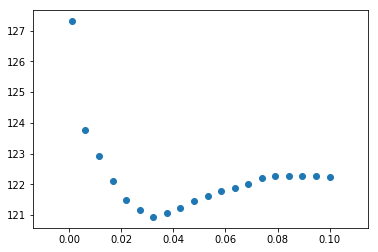

In [179]:

scores =[]
for a in np.linspace(0.001, 0.1, 20):
    scores.append(np.mean(-cross_val_score(Lasso(alpha=a),X_train, y_train, n_jobs=-1, 
                                   scoring="neg_mean_absolute_error", cv=get_fold())))
plt.scatter(np.linspace(0.001, 0.1, 20),scores)

In [185]:
from sklearn.grid_search import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3, 4]}

# clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print(clf.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 19.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

CPU times: user 3.5 s, sys: 1.63 s, total: 5.13 s
Wall time: 34.3 s


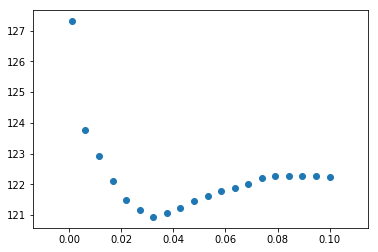

In [190]:
%%time
scores =[]
for a in np.linspace(0.001, 0.1, 20):
    scores.append(np.mean(-cross_val_score(Lasso(alpha=a),np.ascontiguousarray(X_train.values), np.ascontiguousarray(y_train.values), n_jobs=-1, 
                                   scoring="neg_mean_absolute_error", cv=get_fold())))
plt.scatter(np.linspace(0.001, 0.1, 20),scores)